Class Agenda:
1.) Class/Activity Review
2.) Concepts
    A. Distribution Testing
    B. Target Encoding - Assigns a number (better then one hot encoding)
    C. Loss Functions - minimize your error.
3.) Lab
4.) Regularization
    A. Overview

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from scipy.stats import probplot
%matplotlib inline
plt.style.use('seaborn-poster') 

In [5]:
train = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit3/Data/movies/train 2.csv', parse_dates=['release_date'])
test  = pd.read_csv('/Users/swllms/DAT-10-14-SW/class material/Unit3/Data/movies/test.csv', parse_dates=['release_date'])

A. Distribution Testing:
    Probability plot - nice looking chart that is better than a hist plot and offers better flexiblity of what data to use/most impactful

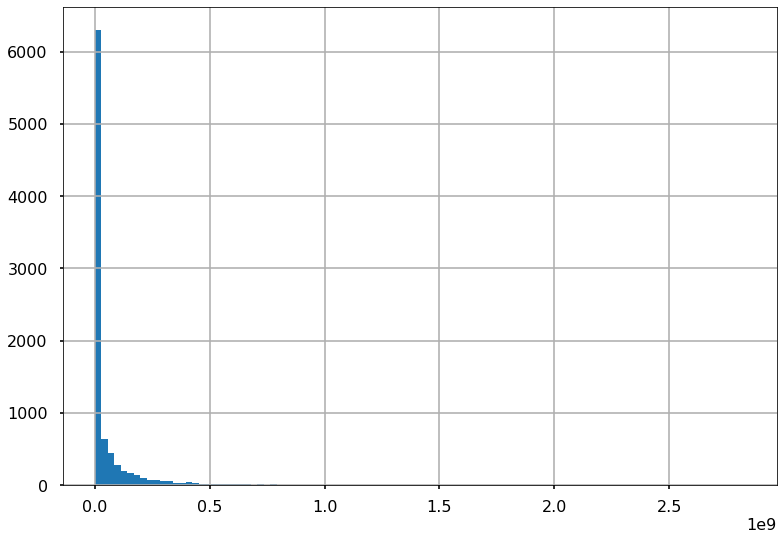

In [7]:
train['revenue'].hist(bins = 100); 
#not bad, but not very precise on distributional chunks

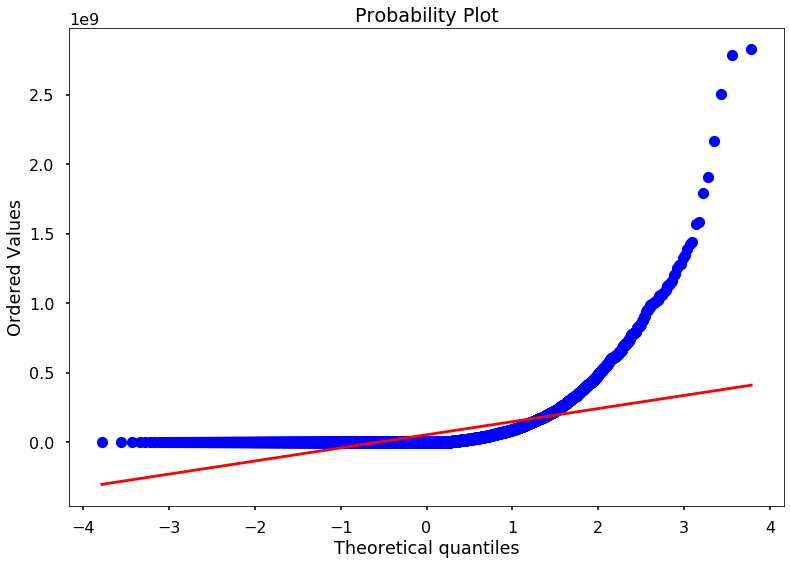

In [8]:
vals, model = probplot(train['revenue'], plot=plt)
#Optionally calcs the line of best fit for the date.
#Chart tells you if this was a hypthetical normal distribution
#Theoretical quantalies is the standatd deviation
#Theoretically it should have negative values, event though they are not there. (Cannot have negative revenue)

In [9]:
model
#(y intercept, Mean, R Squared Value)

(94382012.09287137, 54946959.57808747, 0.6376215163374892)

?probablity use the argument dist = 'norm' is a way to determine the distribuiton you want to fit against. 

2.) Target Encoding: Group based on average value for target variable
    a. Doesn't have an ordinal catagory
    b. Need x30 rows than colms to avoid soft failure
    c. Create a numeric value for categorical data in one colm

In [10]:
train.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0


In [14]:
train['genre'] = train.genres.str.split('|').str[0]

In [15]:
test['genre'] = test.genres.str.split('|').str[0]

In [17]:
genre_grouping = train.groupby('genre')['revenue'].mean()

In [18]:
train['genre_map'] = train['genre'].map(genre_grouping)
#think of it like a V-lookup! 

In [21]:
train[['genre_map']]
#now all in one colm and what the average revenue for everysingle unique genre.

,genre_map
0,6.846030e+07
1,2.757272e+07
2,6.846030e+07
3,4.038222e+07
4,6.846030e+07
5,6.846030e+07
6,2.757272e+07
7,4.829502e+07
8,4.015771e+07
9,4.038222e+07


In [20]:
test['genre_map'] = test['genre'].map(genre_grouping)
#This is mapping the values on your test set to your train set. 
#If missing from train it will leave an empty value
#fill in the null value with the average value of the colm on the train set.
#Very useful to get one colm with values that are not random for catigorical data
    #Better way to fill in with a weighted average you can find more info/reading in the lab
#Does not account for how frequently values occur

C. Loss Functions: 
    i. you can use loss function of log for better results y = np.log1p(train['revenue']) instead of R**2
    ii. linear regression may not always be best, ensambles are next week. 
    